In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
# Step 1: Load the Dataset
data = pd.read_csv('StudentsPerformance.csv')
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [3]:
# Step 2: Basic Information
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [5]:
# Step 3: Check for Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


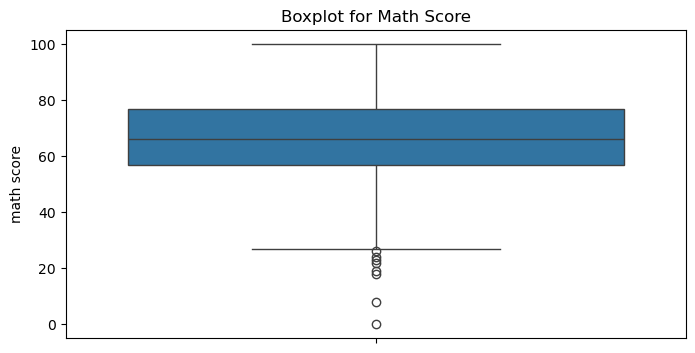

In [6]:
# Step 4: Outlier Detection (Optional Visualization)
plt.figure(figsize=(8, 4))
sns.boxplot(data['math score'])
plt.title('Boxplot for Math Score')
plt.show()

In [7]:
# Step 5: Encode Categorical Variables
le = LabelEncoder()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print("\nData after Label Encoding:")
print(data.head())


Data after Label Encoding:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  


In [8]:
# Step 6: Feature Engineering (Optional: Creating 'average score')
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

In [9]:
# Step 7: Normalize Numerical Features
scaler = StandardScaler()
numeric_columns = ['math score', 'reading score', 'writing score']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [10]:
print("\nData after Scaling Numerical Features:")
print(data.head())


Data after Scaling Numerical Features:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1    0.390024       0.193999       0.391492   
1                        0    0.192076       1.427476       1.313269   
2                        1    1.577711       1.770109       1.642475   
3                        1   -1.259543      -0.833899      -1.583744   
4                        1    0.653954       0.605158       0.457333   

   average score  
0      72.666667  
1      82.333333  
2      92.666667  
3      49.333333  
4      76.333333  


In [11]:
# Step 8: Save Cleaned Data to CSV
cleaned_file_path = 'StudentsPerformance_clean.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned data saved to {cleaned_file_path}")


Cleaned data saved to StudentsPerformance_clean.csv


In [12]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = data.drop(['math score', 'average score'], axis=1)  # Drop target and derived feature
y = data['math score']  # Target variable

# Split into Train and Test sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 7)
Testing set shape: (200, 7)


In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()


In [14]:
# Fit the model using training data
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predict target values for test set
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


Mean Squared Error (MSE): 0.12310243320853469
R-squared (R²) Score: 0.8838026201112223


In [17]:
"Hyperparameter"

'Hyperparameter'

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [19]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],     # Depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum samples per leaf node
}


In [20]:
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,              # 5-fold cross-validation
                           n_jobs=-1,        # Use all CPU cores
                           verbose=2,
                           scoring='neg_mean_squared_error')  # For regression


In [21]:
grid_search.fit(X_train, y_train)

print("Best Parameters Found:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters Found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [22]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Model Mean Squared Error:", mse)
print("Tuned Model R^2 Score:", r2)


Tuned Model Mean Squared Error: 0.1571226856152141
Tuned Model R^2 Score: 0.8516906293911479


In [23]:
# Define class labels based on math score
def score_category(score):
    if score < 40:
        return 'Low'
    elif score < 70:
        return 'Medium'
    else:
        return 'High'

data['math_score_class'] = data['math score'].apply(score_category)


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['math_score_class'] = le.fit_transform(data['math_score_class'])
X = data.drop(['math score', 'average score', 'math_score_class'], axis=1)
y = data['math_score_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [26]:
import pickle

# Save the trained model to a file
pickle.dump(best_model, open('model.pkl', 'wb'))

print("Model has been saved as 'model.pkl'")


Model has been saved as 'model.pkl'


In [27]:
model = pickle.load(open('model.pkl', 'rb'))

In [28]:
# Loading the saved model
loaded_model = pickle.load(open('model.pkl', 'rb'))
print("Model loaded successfully:", loaded_model)


Model loaded successfully: RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=200, random_state=42)


In [29]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

app = Flask(__name__)

@app.route('/')
def home():
    return "Student Performance Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    
    # Example JSON input: {"gender":1, "race_ethnicity":2, "parental_level_of_education":3, "lunch":1, "test_preparation_course":0, "reading_score":0.5, "writing_score":0.4}
    input_features = [data['gender'], data['race_ethnicity'], data['parental_level_of_education'],
                      data['lunch'], data['test_preparation_course'],
                      data['reading_score'], data['writing_score']]
    
    prediction = model.predict([input_features])
    
    return jsonify({'Predicted Class': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load the trained model
model = pickle.load(open('model.pkl', 'rb'))

# Initialize the Flask app
app = Flask(__name__)

# Home route to test if the app is running
@app.route('/')
def home():
    return "Student Performance Prediction Flask API is running!"

# Prediction route (Model Integration)
@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from the request
    data = request.get_json(force=True)
    
    # Extract features from JSON
    input_features = [data['gender'], 
                      data['race_ethnicity'], 
                      data['parental_level_of_education'], 
                      data['lunch'], 
                      data['test_preparation_course'],
                      data['reading_score'], 
                      data['writing_score']]
    
    # Convert to numpy array for model input
    final_features = np.array([input_features])
    
    # Make prediction using the loaded model
    prediction = model.predict(final_features)
    
    # Return prediction as JSON
    return jsonify({'Predicted Class': int(prediction[0])})

# Run the app
if __name__ == '__main__':
    app.run(debug=True)
